# MACHINE LEARNING PROJECT AUTUMN 2024
The dataset was collected from https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # visualization

In [2]:
df = pd.read_csv('iris_extended.csv')
df.head(5)

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [3]:
df.shape

(1200, 21)

In [4]:
print(df['species'].unique())
print(df['soil_type'].unique())

['setosa' 'versicolor' 'virginica']
['sandy' 'clay' 'loamy']


In [5]:
df = df.drop(columns=['sepal_area', 'petal_area', 'sepal_aspect_ratio', 'sepal_petal_width_diff', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'sepal_petal_length_diff', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios'], axis=1
    )

In [6]:
# Replace string values with numbers so we can calculate correlation matrix
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
soil_map = {'sandy': 0, 'clay': 1, 'loamy': 2}
df2 = df.replace({'species': species_map, 'soil_type': soil_map})

df2_corr = df2.corr()
df2_corr = df2_corr.abs()
df2_corr = df2_corr.round(2)

Text(0.5, 1.0, 'Correlation Matrix')

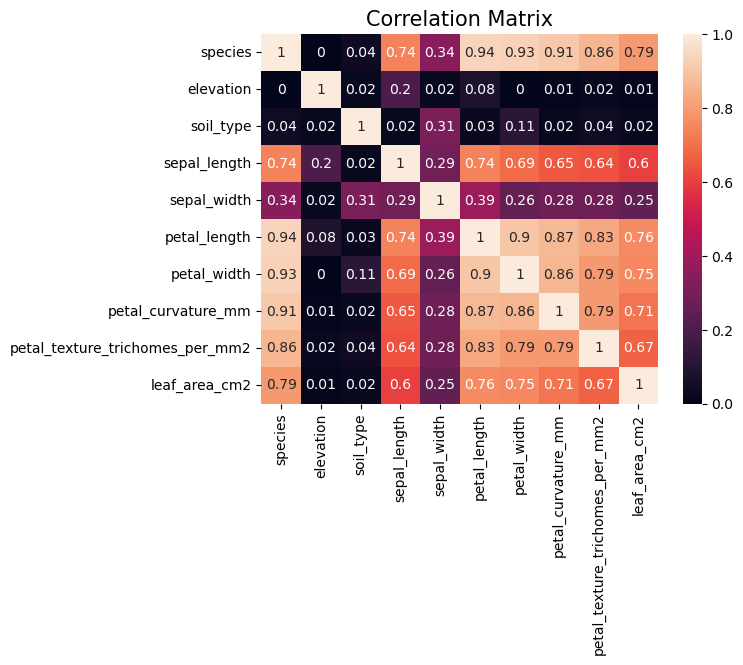

In [7]:
# Correlation matrix
ax= plt.subplot()

sns.heatmap(df2_corr, annot=True, fmt='g', ax=ax)
ax.set_title('Correlation Matrix',fontsize=15)

In [8]:
np.corrcoef(x = df['petal_length'],y = df['petal_width'])

array([[1.        , 0.90169588],
       [0.90169588, 1.        ]])

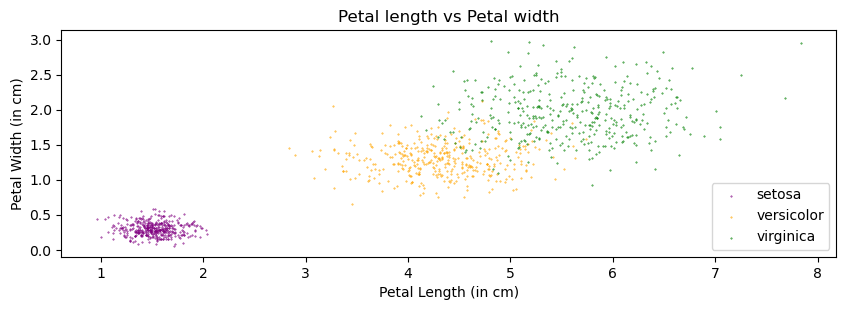

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(3,1,1)
ax.scatter((df[df['species']=='setosa'])['petal_length'], (df[df['species']=='setosa'])['petal_width'], color='purple', s=0.15, label='setosa')
ax.scatter((df[df['species']=='versicolor'])['petal_length'], (df[df['species']=='versicolor'])['petal_width'], color = 'orange', s=0.15, label='versicolor')
ax.scatter((df[df['species']=='virginica'])['petal_length'], (df[df['species']=='virginica'])['petal_width'], color = 'green', s=0.15, label='virginica')
ax.set_xlabel('Petal Length (in cm)')
ax.set_ylabel('Petal Width (in cm)')
ax.set_title('Petal length vs Petal width')
ax.legend(loc='lower right')

plt.show()
#very correlated

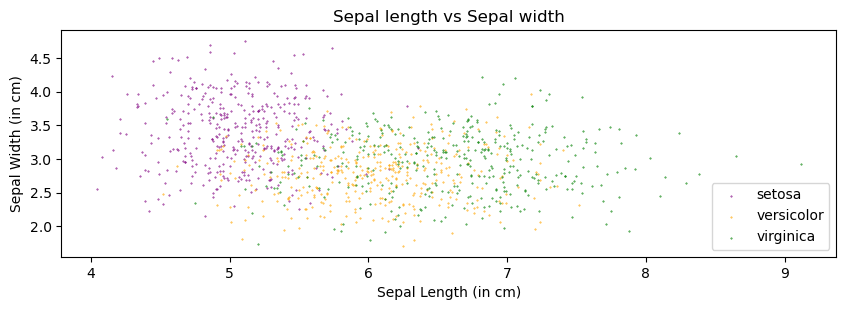

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(3,1,1)
ax.scatter((df[df['species']=='setosa'])['sepal_length'], (df[df['species']=='setosa'])['sepal_width'], color='purple', s=0.15, label='setosa')
ax.scatter((df[df['species']=='versicolor'])['sepal_length'], (df[df['species']=='versicolor'])['sepal_width'], color = 'orange', s=0.15, label='versicolor')
ax.scatter((df[df['species']=='virginica'])['sepal_length'], (df[df['species']=='virginica'])['sepal_width'], color = 'green', s=0.15, label='virginica')
ax.set_xlabel('Sepal Length (in cm)')
ax.set_ylabel('Sepal Width (in cm)')
ax.set_title('Sepal length vs Sepal width')
ax.legend(loc='lower right')

plt.show()
#this is fine

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree, export_graphviz

df2.columns

Index(['species', 'elevation', 'soil_type', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'petal_curvature_mm',
       'petal_texture_trichomes_per_mm2', 'leaf_area_cm2'],
      dtype='object')

In [12]:
#drop columns we dont want to use
df2 = df2[['species','sepal_length', 'petal_length', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2']]
df2

,species,sepal_length,petal_length,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2
0,0,5.16,1.64,5.33,18.33,53.21
1,0,5.48,1.53,5.90,20.45,52.53
2,0,5.10,1.47,5.66,24.62,50.25
3,0,4.64,1.53,4.51,22.91,50.85
4,0,4.85,1.23,4.03,21.56,40.57
...,...,...,...,...,...,...
1195,2,5.36,5.16,11.61,11.52,59.46
1196,2,7.49,7.68,13.85,6.99,77.12
1197,2,6.79,4.72,13.13,9.16,74.39
1198,2,6.38,5.30,11.01,6.46,73.90


In [13]:
#separate X and y
y = df2['species']
X = df2.drop(columns = ["species"])

In [14]:
#split data into 70% train, 20% validation and 10% test
X_train, X_combined, y_train, y_combined = train_test_split(X, y, train_size=0.7, random_state = 2)
X_val, X_test, y_val, y_test = train_test_split(X_combined, y_combined, test_size=0.3333, random_state = 2)
print(len(X_train), len(X_val), len(X_test))

840 240 120


### Model 1: Decision tree

In [15]:
clf = DecisionTreeClassifier(random_state=0, max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

In [16]:
acc = accuracy_score(y_val, y_pred)
conf_mat = confusion_matrix(y_val, y_pred)
print('Accuracy: ', acc)
print('Confusion Matrix:\n', conf_mat)
print('Error: ', 1-acc)

Accuracy:  0.9791666666666666
Confusion Matrix:
 [[72  0  0]
 [ 0 88  3]
 [ 0  2 75]]
Error:  0.02083333333333337


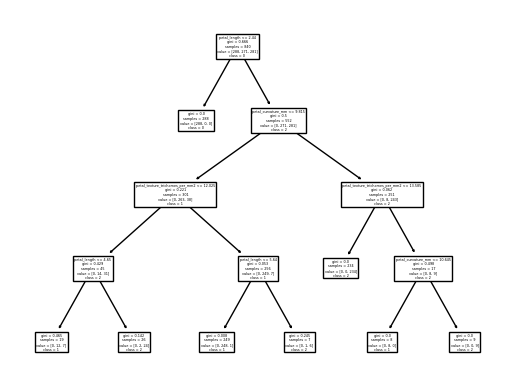

True

In [17]:
plot_tree(clf, feature_names = list(X.columns), class_names = ['0','1','2'])
plt.show()

import pydotplus
d_tree = export_graphviz(clf, feature_names = list(X.columns), class_names = ['0','1','2'])
pydot_graph = pydotplus.graph_from_dot_data(d_tree)
pydot_graph.write_pdf('Flowers.pdf')

### Model 2: MLP Classifier 
with varying layers, for validation

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

## define a list of values for the number of hidden layers
num_layers = [1,2,3,4,5] # number of hidden layers
num_neurons = 12  # number of neurons in each layer


# we will use this variable to store the resulting training errors corresponding to different hidden-layer numbers
mlp_tr_errors = []
mlp_val_errors = []

for i, num in enumerate(num_layers):
    hidden_layer_sizes = tuple([num_neurons]*num) # size (num of neurons) of each layer stacked in a tuple
    print("Layers:", i)
    
    mlp_clss = MLPClassifier(hidden_layer_sizes, max_iter = 1000, random_state = 42)
    mlp_clss.fit(X_train, y_train)
    
    ## evaluate the trained MLP on both training set and validation set
    y_pred_train = mlp_clss.predict(X_train)    # predict on the training set
    tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
    y_pred_val = mlp_clss.predict(X_val) # predict values for the validation data 
    val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error
    
    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)
    acc = accuracy_score(y_val, y_pred_val)
    conf_mat = confusion_matrix(y_val, y_pred_val)
    print('Accuracy:', acc)
    print('Confusion Matrix:\n', conf_mat)
    print('Error:', 1 - acc, '\n')

print(mlp_tr_errors)

Layers: 0
Accuracy: 0.9833333333333333
Confusion Matrix:
 [[72  0  0]
 [ 0 88  3]
 [ 0  1 76]]
Error: 0.01666666666666672 

Layers: 1
Accuracy: 0.9875
Confusion Matrix:
 [[72  0  0]
 [ 0 89  2]
 [ 0  1 76]]
Error: 0.012499999999999956 

Layers: 2
Accuracy: 0.9875
Confusion Matrix:
 [[71  1  0]
 [ 0 89  2]
 [ 0  0 77]]
Error: 0.012499999999999956 

Layers: 3
Accuracy: 0.9875
Confusion Matrix:
 [[72  0  0]
 [ 0 89  2]
 [ 0  1 76]]
Error: 0.012499999999999956 

Layers: 4
Accuracy: 0.9791666666666666
Confusion Matrix:
 [[71  1  0]
 [ 2 87  2]
 [ 0  0 77]]
Error: 0.02083333333333337 

[0.01904761904761905, 0.02023809523809524, 0.01904761904761905, 0.016666666666666666, 0.023809523809523808]


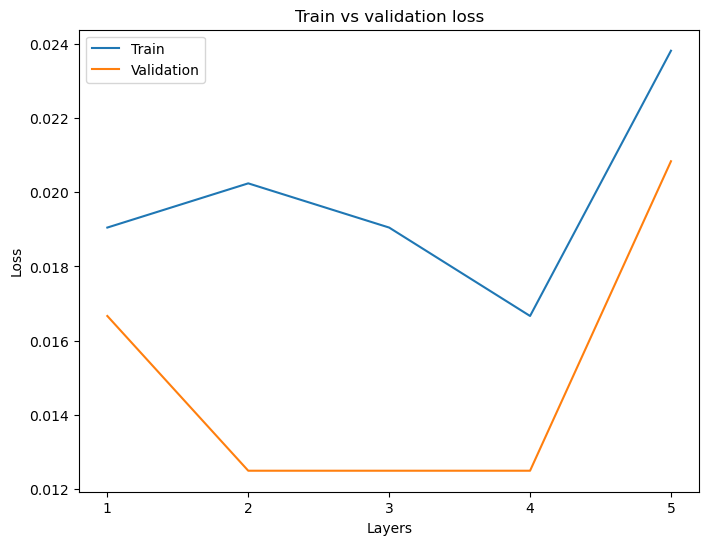

In [19]:
plt.figure(figsize=(8, 6))

plt.plot(num_layers, mlp_tr_errors, label = 'Train')
plt.plot(num_layers, mlp_val_errors,label = 'Validation')
plt.xticks(num_layers)
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [20]:
# Create the 'best' mlp classifier based on the above validation
mlp_clf = MLPClassifier(tuple([num_neurons]*2), max_iter = 1000, random_state = 42)
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 12), max_iter=1000, random_state=42)

# Testing the models

In [21]:
# Score of mlp regressor
mlp_y_pred = mlp_regr.predict(X_test)
acc = accuracy_score(y_test, mlp_y_pred)
conf_mat = confusion_matrix(y_test, mlp_y_pred)
print(mlp_regr.score(X_test, y_test))
print("Test Accuracy:", acc) 
print("Confusion Matrix:\n", conf_mat)
print("Test error:", 1-acc)

0.975
Test Accuracy: 0.975
Confusion Matrix:
 [[40  0  0]
 [ 0 37  1]
 [ 0  2 40]]
Test error: 0.025000000000000022
